In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go



data=pd.read_excel('Stock_Price_data_set.xlsx')

data.info()

from plotly.offline import plot
from plotly.offline import download_plotlyjs,iplot,init_notebook_mode



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


stock price details from 2018-02-05 00:00:00 to 2022-02-04 00:00:00
Totally 1460 days


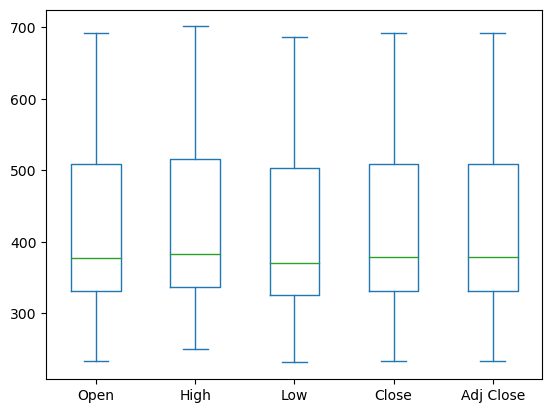

In [3]:
data[['Open','High','Low','Close','Adj Close']].plot(kind='box')
data.head()
print(f"stock price details from {data.Date.min()} to {data.Date.max()}")
print(f'Totally {(data.Date.max() - data.Date.min()).days} days')

In [4]:
layout=go.Layout(title='stock predictions',
                 xaxis=dict(title='date'),
                 yaxis=dict(title='price'))



stockdata = [{'x':data['Date'],'y':data['Close']}]

plot=go.Figure(data=stockdata,layout=layout)

iplot(plot)


                 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


In [10]:
x=np.array(data.index).reshape(-1,1) #-1 means the row value is unknown
y=data['Close']

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=101)

scaler=StandardScaler().fit(X_train)

In [11]:
lr = LinearRegression()
lr.fit(X_train,Y_train)



LinearRegression()

In [8]:
g1 = go.Scatter(
    x=X_train.T[0],
    y=Y_train,
    mode='markers',
    name='actual'
)

g2=go.Scatter(
    x=X_train.T[0],
    y=lr.predict(X_train).T,
    mode='lines',
    name='predicted'
)

predata=[g1,g2]
#layout.xaxis.title.text='day'
plot2=go.Figure(data=predata,layout=layout)
iplot(plot2)

In [9]:
scores=f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train,lr.predict(X_train))}\t{r2_score(Y_test,lr.predict(X_test))}
{'mse'.ljust(10)}{mse(Y_train,lr.predict(X_train))}\t{mse(Y_test,lr.predict(X_test))}
'''


print(scores)


Metric           Train                Test        
r2_score  0.7028958230325895	0.7274982898502823
mse       3434.5839374687735	3359.5269242393792

